In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings('ignore')
import os
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [31]:
print("Train Shape --> ",df_train.shape)
print("Test Shape --> ",df_test.shape)

Train Shape -->  (60000, 785)
Test Shape -->  (10000, 785)


In [32]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train = df_train.drop(["label"], axis = 1).values
y_train = df_train.label.values

X_test = df_test.drop(["label"], axis = 1).values
y_test = df_test.label.values

In [35]:
print("X_train shape --> ",X_train.shape)
print("y_train shape --> ",y_train.shape)
print("X_test shape --> ",X_test.shape)
print("y_test shape --> ",y_test.shape)

X_train shape -->  (60000, 784)
y_train shape -->  (60000,)
X_test shape -->  (10000, 784)
y_test shape -->  (10000,)


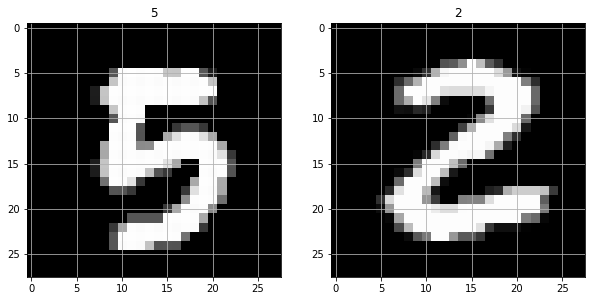

In [36]:
plt.figure(figsize=(10,8))
img = X_train[244]
img = img.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(df_train.iloc[244,0])
plt.grid()

img1 = X_train[25]
img1 = img1.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title(df_train.iloc[25,0])
plt.grid()
plt.show()

In [37]:
X_train = (X_train.astype(np.float32)-127.5)/127.5
print("X_train Shape --> ",X_train.shape)

X_train Shape -->  (60000, 784)


In [38]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [39]:
generator = Sequential()
generator.add(Dense(units = 512, input_dim = 100))
generator.add(ReLU())

generator.add(Dense(units = 512))
generator.add(ReLU())

generator.add(Dense(units = 1024))
generator.add(ReLU())

In [40]:
generator.add(Dense(units = 784, activation = "tanh"))

In [41]:
generator.compile(loss = "binary_crossentropy",
                optimizer = Adam(lr = 0.0001, beta_1 = 0.5))

In [42]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               51712     
                                                                 
 re_lu_6 (ReLU)              (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_7 (ReLU)              (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_8 (ReLU)              (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 784)              

In [43]:
discriminator = Sequential()
discriminator.add(Dense(units = 1024, input_dim = 784))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))

discriminator.add(Dense(units = 512))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))

discriminator.add(Dense(units = 256))
discriminator.add(ReLU())

In [44]:
discriminator.add(Dense(units = 1, activation = "sigmoid"))

In [45]:
discriminator.compile(loss = "binary_crossentropy",
                      optimizer = Adam(lr = 0.0001, beta_1 = 0.5))

In [46]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1024)              803840    
                                                                 
 re_lu_9 (ReLU)              (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 re_lu_10 (ReLU)             (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)              

In [47]:
discriminator.trainable = False
gan_input = Input(shape = (100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs = gan_input, outputs = gan_output)
gan.compile(loss = "binary_crossentropy", optimizer = "adam")

In [48]:
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 784)               1643280   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [49]:
epochs = 50
batch_size = 256

In [ ]:
for e in range(epochs):
    for _ in range(batch_size):
        

        noise = np.random.normal(0,1, [batch_size, 100])  
        

        generated_images = generator.predict(noise)
        

        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)]
        

        x = np.concatenate([image_batch, generated_images])
        

        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        

        discriminator.trainable = True
        discriminator.train_on_batch(x,y_dis)
        

        noise = np.random.normal(0,1, [batch_size,100]) 
        y_gen = np.ones(batch_size)
        
        discriminator.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    print("epochs: ",e)

epochs:  0
epochs:  1
epochs:  2
epochs:  3
epochs:  4
epochs:  5


In [ ]:
plt.figure(figsize=(25,16))
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = generator.predict(noise)
generated_images = generated_images.reshape(100,28,28)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap = "gray")
    plt.axis('off')

plt.suptitle("Pictures Produced Using the GANs Model", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()